# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan 
to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends 
across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better 
all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically,
they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Outputs expected from this assignment - 

- Factors affecting the demand of the shared bikes.
- Keeping total count as the dependednt variable and all others as independent variable, design a ML model which can predict which factors are most
  likely to affect the overall demand of these bikes.

## Importing Necessary Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing the data file & extracting useful information from it

In [2]:
bike_data = pd.read_csv('day.csv')

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Findings - 
- There are a total of 730 rows and all the columns have non-null values.
- There are a total of 16 columns and all of them contain numeric values.

## Dropping Unnecessary columns

In [7]:
# Since the Output demands us to predict factors affecting the overall business, Casual and Registered counts would not be needed as we have Cnt
# Also, Instant is just the row count, so we can get rid of it too.
# dteday records the date which doesnt seem to be contributing much to this analysis as we already have multiple parameters in place of it.
bike_data.drop(['instant','dteday','casual','registered'], axis = 1, inplace=True)

In [8]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Converting few Numerical Columns to Categorical Columns for further analysis

In [9]:
# Columns like Season, Month, Weekday, Weathersit are represented as numbers which needs to be converted into Categories for further analysis
bike_data[['season']] = bike_data[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))
bike_data[['mnth']] = bike_data[['mnth']].apply(lambda x: x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
                                                                 9:'September',10:'October',11:'November',12:'December'}))
bike_data[['weekday']] = bike_data[['weekday']].apply(lambda x: x.map({1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}))
bike_data[['weathersit']] = bike_data[['weathersit']].apply(lambda x: x.map({1:'Clear', 2:'Mist', 3:'Light Snow'}))

In [10]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualization of Data and Extracting correlations between variables

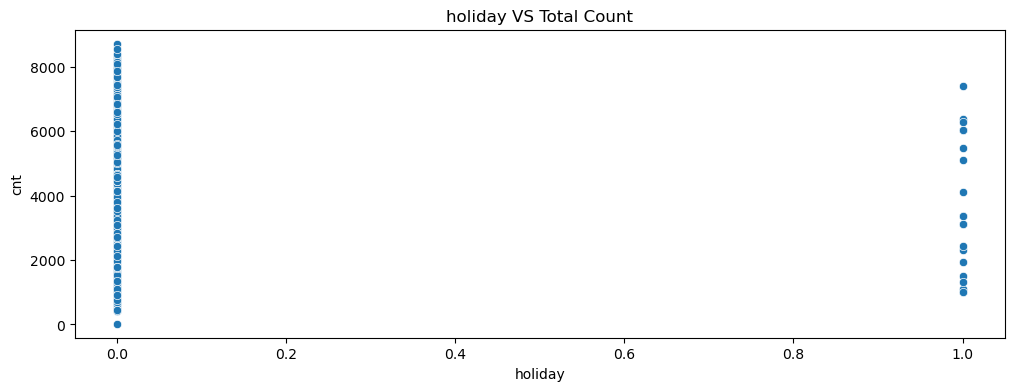

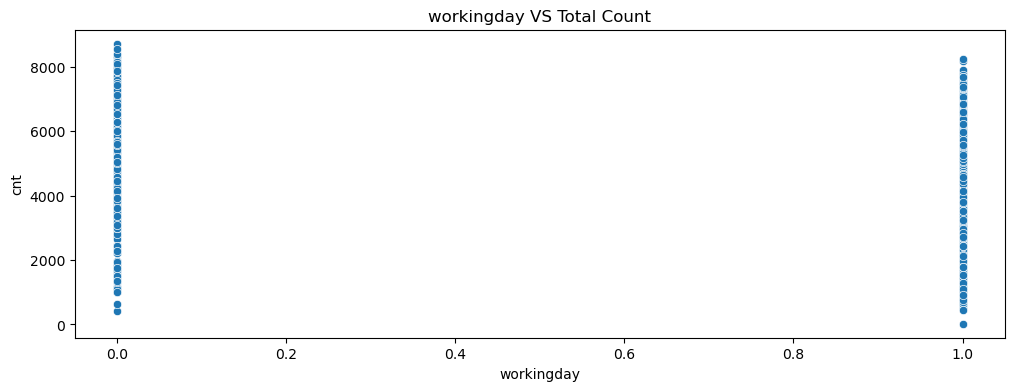

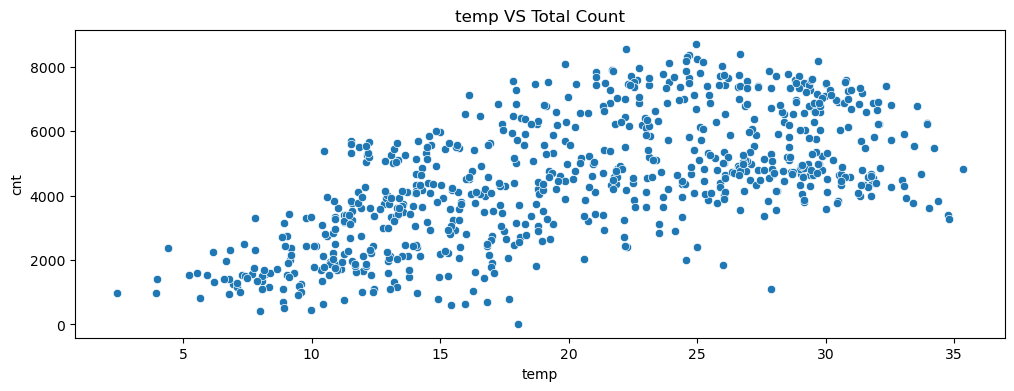

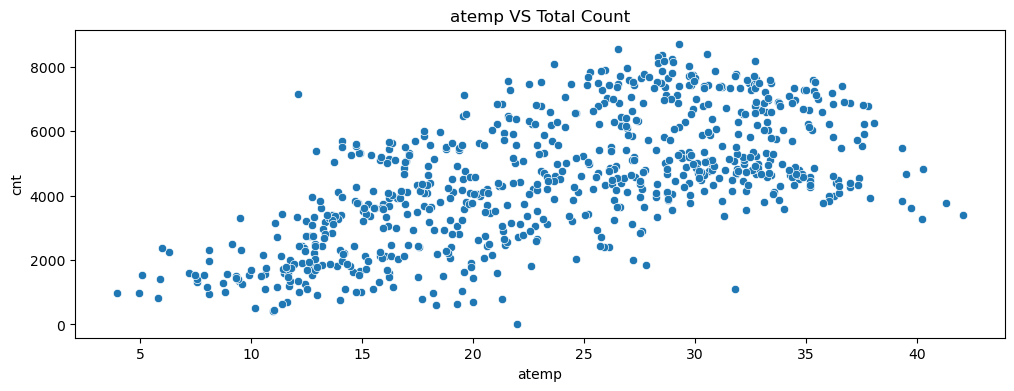

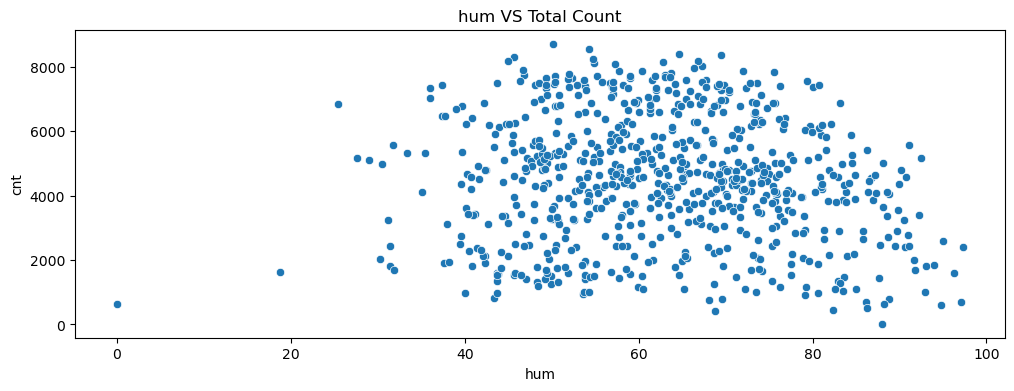

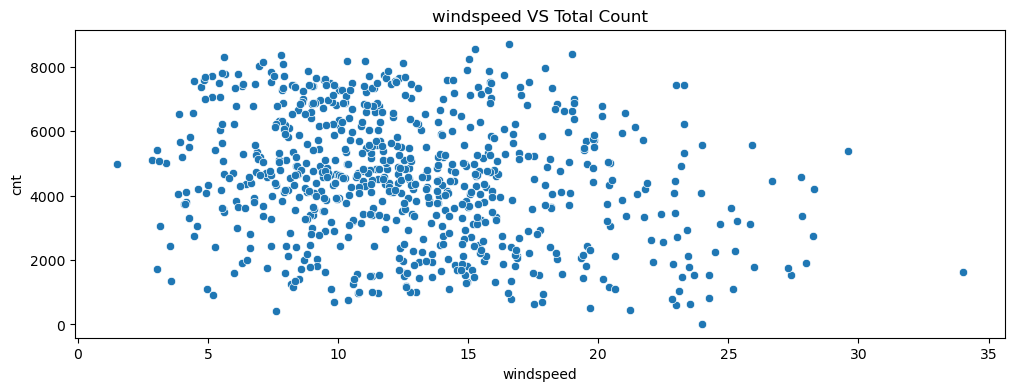

In [11]:
# Visualizing Numerical Data w.r.t Cnt
var_list=['holiday','workingday','temp','atemp','hum','windspeed']
for i in var_list:
    plt.figure(figsize=[12,4])
    sns.scatterplot(data = bike_data, x= i, y= 'cnt')
    plt.title(i+ ' VS Total Count')
    plt.show()

### Insights from above graphs - 
- Holiday vs count - People do not prefer renting bikes on holiday.
- Working day vs count - There doesnt seem much difference b/w a working day and non-working day for renting a bike.
- Temp vs count - There seems a positive trend b/w rise in temperature and renting bikes.
- ATemp vs count - There seems a positive trend b/w rise in feeling temperature and renting bikes.
- Hum vs count - An exact trend cannot be judged b/w rise in Humidity and renting bikes based on the graph above.
- Windspeed vs count - There seems to be a positive trend b/w rise in windspeed and renting bikes 

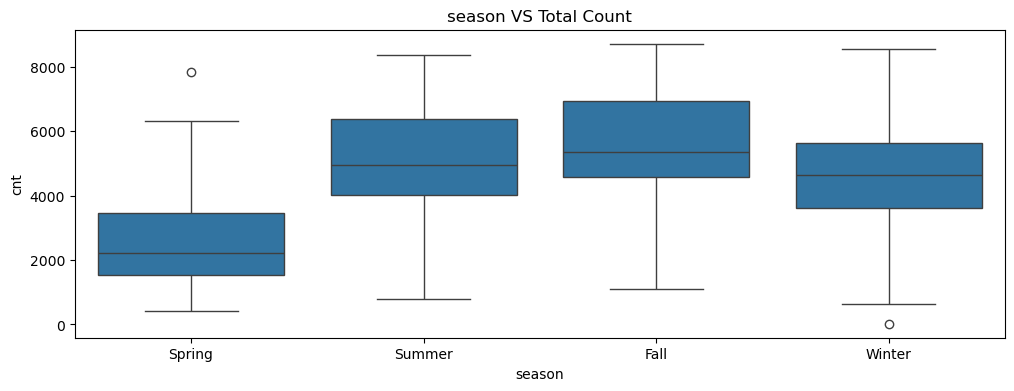

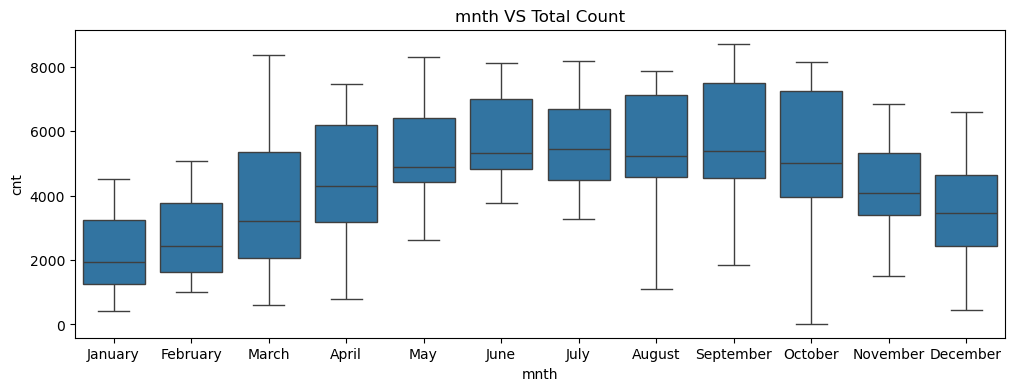

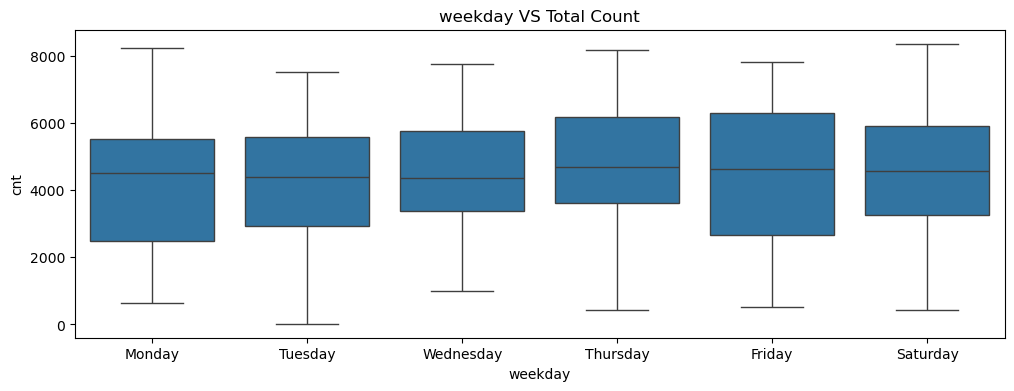

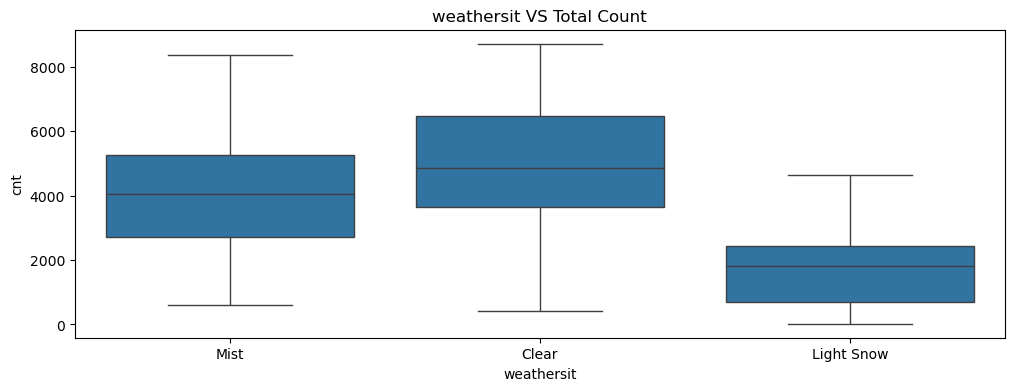

In [12]:
# Visualizing Categorical Columns w.r.t. Cnt
var_list=['season','mnth','weekday','weathersit']
for i in var_list:
    plt.figure(figsize=[12,4])
    sns.boxplot(data = bike_data, x= i, y= 'cnt')
    plt.title(i+ ' VS Total Count')
    plt.show()

### Insights from above graphs - 
- Season vs count - There seems to be a significant drop in renting bikes during the Spring season.
- Month vs count - There seems to be a drop in renting bikes starting from November and the trend continues till February.
- Weekday vs count - The median of all the weekdays seems to be lying the similar region.
- Weathersit vs count - People seem to be renting bikes mostly on a clear day and avoid renting them during snowy and rainy weathers.

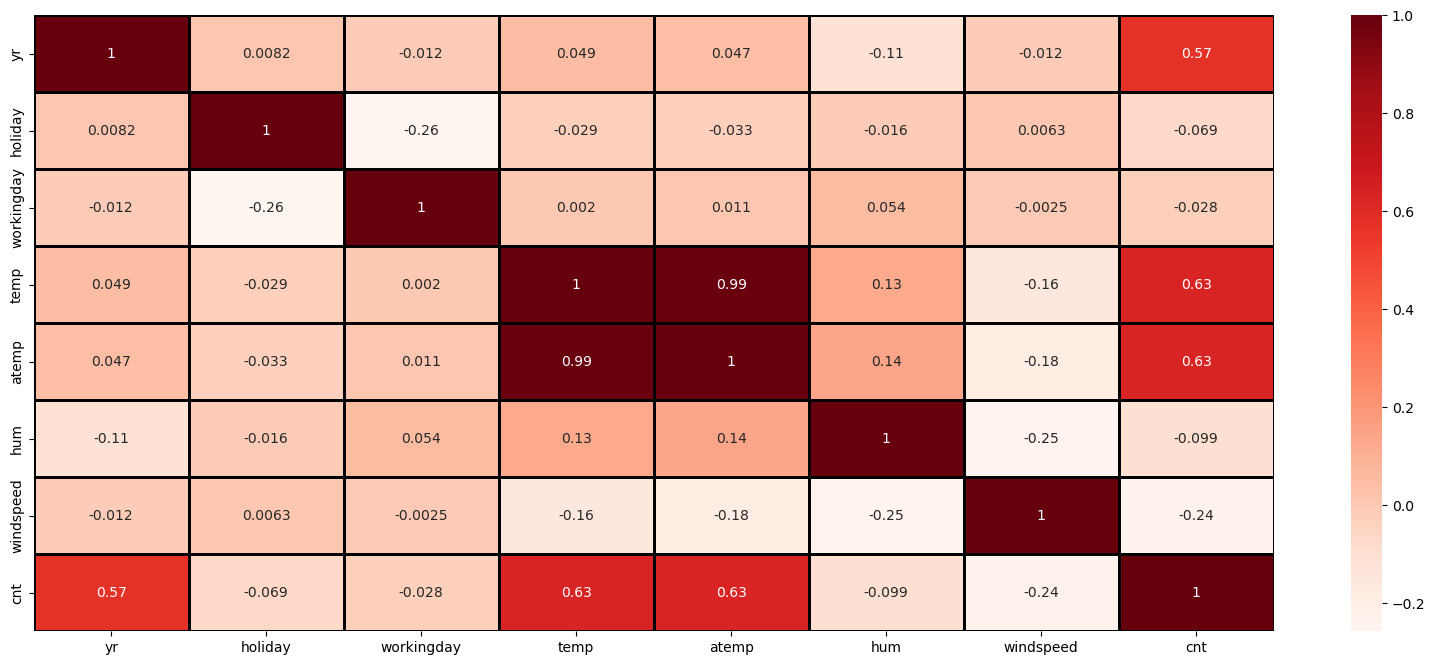

In [13]:
# Correlation among variables.
plt.figure(figsize=[20,8])
sns.heatmap(bike_data[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(), annot=True, cmap='Reds', 
            linewidths=2,linecolor='black')
plt.show()

### Insights from above graph - 
- There seems to be a good correlation b/w Year and Count equal to 0.57.
- There seems to be a good correlation b/w Temp and Count equal to 0.63.
- There seems to be a good correlation b/w ATemp and Count equal to 0.63.
- There seems to be a good correlation b/w Temp and ATemp equal to 0.99.

In [14]:
# Since there is a very high correlation b/w variables Temp and ATemp we can drop 1 of the variable.
bike_data.drop('atemp', axis=1, inplace=True)

In [15]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


## Dummy Variables Creation

In [16]:
# Since the ML model would not recognize any categorical values, we will conver them into numerical values.
# Also we will drop the first column since we know if all the other three columns have a 0 value then it would be the 4th column.
season_dummies = pd.get_dummies(bike_data['season'], drop_first=True, dtype=int)
season_dummies.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
# Repating the same step for all other Categorical columns.
mnth_dummies = pd.get_dummies(bike_data['mnth'], drop_first=True, dtype=int)
weekday_dummies = pd.get_dummies(bike_data['weekday'], drop_first=True, dtype=int)
weathersit_dummies = pd.get_dummies(bike_data['weathersit'], drop_first=True, dtype=int)

In [18]:
# Now combining all the above created data frames into Original Data Frame.
bike_data=pd.concat([bike_data,season_dummies,mnth_dummies,weekday_dummies,weathersit_dummies], axis=1)

In [19]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,Spring,0,January,0,Monday,1,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Now that we have all the Categorical values converted to Numerical values, we can drop the Categorical values column.
bike_data.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

In [21]:
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Now that we have all the Numerical Data that we need, we can move ahead and split the data into Test and Train sets.

## Importing Necessary Libraries for ML Agorithm

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Splitting the data into Train and Test Data.

In [24]:
np.random.seed(0)
# We are using np.random.seed as 0 so we can obtain the same rows if we re run again and the rows dont get shuffle as it might affect our model.
bike_data_train,bike_data_test=train_test_split(bike_data, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the values

In [25]:
scaler = MinMaxScaler()

In [26]:
# This step is important as we have almost all columns having values b/w 0 and 1, where as values for Temp, Hum, Windspeed and Cnt has values above 1,
# This will affect the model in a way which would be hard to interpret, So we will scale the values for this column.
vars = ['temp','hum','windspeed','cnt']
bike_data_train[vars] = scaler.fit_transform(bike_data_train[vars])

In [27]:
bike_data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# Now that the all the values in the train dataframe have min as 0 and max as 1 we can move ahead with model creation.

### Dividing into X and y 

In [29]:
y_train = bike_data_train.pop('cnt')
X_train=bike_data_train

In [30]:
bike_data_train.shape

(510, 27)

## Performing RFE

In [31]:
# Since there are 27 Features (Columns), deducing 1 after 1 would be very time taking, So we can run a RFE and find the Top 15 significant columns.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 6),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 13),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 4),
 ('Saturday', False, 9),
 ('Thursday', False, 11),
 ('Tuesday', False, 3),
 ('Wednesday', False, 7),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer', 'Winter', 'December', 'January', 'July', 'November', 'September', 'Light Snow', 'Mist'], dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['workingday', 'August', 'February', 'June', 'March', 'May', 'October', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object')

## Acceptance Criteria for this Analysis

- P>|t| < 0.005
- VIF < 5

## Creating 1st Model

In [35]:
# Adding a constant to X_train as if we miss this step, statsmodel will fit a line starting from the Origin.
X_train_rfe = X_train[col]
X_train_lm = sm.add_constant(X_train_rfe)
# Creating the first fitted model. 
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [36]:
# To check how well the line fitted we can print the summary and inspect few parameters like P value and R Squared.
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          3.34e-189
Time:                        22:01:49   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

#### Insights from the Summary - 
- Value of R-Squared is at 84.5% which means its a great fit and more than 84% of the graph could be understood by the model.
- Adjusted R-Squared obtained is 84.1%.
- P>|t| describes how much significant a variable where values close to 0 means very significant and values close to 1 means insignificant.
- Most insignificant variables as per the P values and our Acceptance Criteria are - Summer, January, November & December.

In [37]:
# Before deciding to drop any column, we can check for VIF to determine how the features are correlated with each other.
VIF = pd.DataFrame()
X = X_train_rfe
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by='VIF', ascending = False)
VIF

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.81
14,Mist,2.32
0,yr,2.09
11,November,1.83
9,January,1.75


In [38]:
# As per the above results December has a high P value, so we will drop it from our model.
X_train_rfe = X_train_rfe.drop('December', axis=1)

## Creating 2nd Model

In [39]:
# Adding a constant to X_train as if we miss this step, statsmodel will fit a line starting from the Origin.
X_train_lm = sm.add_constant(X_train_rfe)
# Creating the first fitted model. 
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [40]:
# To check how well the line fitted we can print the summary and inspect few parameters like P value and R Squared.
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          2.25e-189
Time:                        22:01:50   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.0

#### Insights from the Summary - 
- Value of R-Squared is still at 84.4% which means its a great fit and more than 84% of the graph could be understood by the model.
- Adjusted R-Squared obtained is 84% and is 0.1% less than the previous Model.
- P>|t| describes how much significant a variable where values close to 0 means very significant and values close to 1 means insignificant.
- Most insignificant variables as per the P values are - January & November.

In [41]:
# Before deciding to drop any column, we can check for VIF to determine how the features are correlated with each other.
VIF = pd.DataFrame()
X = X_train_rfe
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by='VIF', ascending = False)
VIF

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,Spring,4.37
7,Winter,3.78
6,Summer,2.79
13,Mist,2.29
0,yr,2.09
8,January,1.67
9,July,1.59


In [42]:
# As per the above results November has a high P value, so we will drop it from our model.
X_train_rfe = X_train_rfe.drop('November', axis=1)

## Creating 3rd Model

In [43]:
# Adding a constant to X_train as if we miss this step, statsmodel will fit a line starting from the Origin.
X_train_lm = sm.add_constant(X_train_rfe)
# Creating the first fitted model. 
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [44]:
# To check how well the line fitted we can print the summary and inspect few parameters like P value and R Squared.
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          4.45e-190
Time:                        22:01:50   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.035      8.466      0.0

#### Insights from the Summary - 
- Value of R-Squared is still at 84.3% which means its a great fit and more than 84% of the graph could be understood by the model.
- Adjusted R-Squared obtained is 83.9 % and is 0.1% less than the previous Model.
- P>|t| describes how much significant a variable where values close to 0 means very significant and values close to 1 means insignificant.
- Most insignificant variables as per the P values are - January & Spring.

In [45]:
# Before deciding to drop any column, we can check for VIF to determine how the features are correlated with each other.
VIF = pd.DataFrame()
X = X_train_rfe
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by='VIF', ascending = False)
VIF

,Features,VIF
3,hum,29.05
2,temp,16.70
4,windspeed,4.66
5,Spring,4.34
7,Winter,3.38
6,Summer,2.78
12,Mist,2.28
0,yr,2.09
8,January,1.67
9,July,1.59


In [46]:
# As per the above results January has a high P value, so we will drop it from our model.
X_train_rfe = X_train_rfe.drop('January', axis=1)

## Creating 4th Model

In [47]:
# Adding a constant to X_train as if we miss this step, statsmodel will fit a line starting from the Origin.
X_train_lm = sm.add_constant(X_train_rfe)
# Creating the first fitted model. 
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [48]:
# To check how well the line fitted we can print the summary and inspect few parameters like P value and R Squared.
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          1.69e-190
Time:                        22:01:51   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

#### Insights from the Summary - 
- Value of R-Squared is still at 84.2% which means its a great fit and more than 84% of the graph could be understood by the model.
- Adjusted R-Squared obtained is 83.8 % and is 0.1% less than the previous Model.
- P>|t| describes how much significant a variable where values close to 0 means very significant and values close to 1 means insignificant.
- Most insignificant variables as per the P values is - Spring.

In [49]:
# Before deciding to drop any column, we can check for VIF to determine how the features are correlated with each other.
VIF = pd.DataFrame()
X = X_train_rfe
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by='VIF', ascending = False)
VIF

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,Spring,4.01
7,Winter,3.35
6,Summer,2.78
11,Mist,2.28
0,yr,2.08
8,July,1.58
9,September,1.38


In [50]:
# As per the above results Spring has a high P value, so we will drop it from our model.
X_train_rfe = X_train_rfe.drop('Spring', axis=1)

## Creating 5th Model

In [51]:
# Adding a constant to X_train as if we miss this step, statsmodel will fit a line starting from the Origin.
X_train_lm = sm.add_constant(X_train_rfe)
# Creating the first fitted model. 
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [52]:
# To check how well the line fitted we can print the summary and inspect few parameters like P value and R Squared.
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          3.89e-190
Time:                        22:01:51   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2257      0.027      8.368      0.0

#### Insights from the Summary - 
- Value of R-Squared is still at 84% which means its a great fit and 84% of the graph could be understood by the model.
- Adjusted R-Squared obtained is 83.6 % and is 0.2% less than the previous Model.
- P>|t| describes how much significant a variable where values close to 0 means very significant and values close to 1 means insignificant.
- Most insignificant variables as per the P values is - July.

In [53]:
# Before deciding to drop any column, we can check for VIF to determine how the features are correlated with each other.
VIF = pd.DataFrame()
X = X_train_rfe
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by='VIF', ascending = False)
VIF

,Features,VIF
3,hum,14.55
2,temp,10.20
4,windspeed,3.56
10,Mist,2.11
0,yr,2.02
5,Summer,1.76
6,Winter,1.71
7,July,1.55
8,September,1.29
9,Light Snow,1.16


In [54]:
# As per the above results July has a high P value, so we will drop it from our model.
X_train_rfe = X_train_rfe.drop('July', axis=1)

## Creating 6th Model

In [55]:
# Adding a constant to X_train as if we miss this step, statsmodel will fit a line starting from the Origin.
X_train_lm = sm.add_constant(X_train_rfe)
# Creating the first fitted model. 
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [56]:
# To check how well the line fitted we can print the summary and inspect few parameters like P value and R Squared.
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          7.80e-190
Time:                        22:01:51   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2256      0.027      8.314      0.0

#### Insights from the Summary - 
- Value of R-Squared is still at 83.8% which means its a great fit and almost 84% of the graph could be understood by the model.
- Adjusted R-Squared obtained is 83.4 % and is 0.2% less than the previous Model.
- P>|t| describes how much significant a variable where values close to 0 means very significant and values close to 1 means insignificant.
- All variables are per the P values are significant.

In [57]:
# Before deciding to drop any column, we can check for VIF to determine how the features are correlated with each other.
VIF = pd.DataFrame()
X = X_train_rfe
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by='VIF', ascending = False)
VIF

,Features,VIF
3,hum,14.27
2,temp,8.00
4,windspeed,3.55
9,Mist,2.11
0,yr,2.01
6,Winter,1.66
5,Summer,1.58
7,September,1.21
8,Light Snow,1.16
1,holiday,1.04


In [58]:
# As per the above results hum has a high VIF, so we will drop it from our model.
X_train_rfe = X_train_rfe.drop('hum', axis=1)

## Creating 7th Model

In [59]:
# Adding a constant to X_train as if we miss this step, statsmodel will fit a line starting from the Origin.
X_train_lm = sm.add_constant(X_train_rfe)
# Creating the first fitted model. 
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [60]:
# To check how well the line fitted we can print the summary and inspect few parameters like P value and R Squared.
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          1.37e-186
Time:                        22:01:52   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.017      7.541      0.0

#### Insights from the Summary - 
- Value of R-Squared is still at 83.1% which means its a great fit and more than 83% of the graph could be understood by the model.
- Adjusted R-Squared obtained is 82.8 % and is 0.6% less than the previous Model.
- P>|t| describes how much significant a variable where values close to 0 means very significant and values close to 1 means insignificant.
- All variables are per the P values are significant.

In [61]:
# Before deciding to drop any column, we can check for VIF to determine how the features are correlated with each other.
VIF = pd.DataFrame()
X = X_train_rfe
VIF['Features'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by='VIF', ascending = False)
VIF

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,Summer,1.56
8,Mist,1.48
5,Winter,1.38
6,September,1.20
7,Light Snow,1.08
1,holiday,1.03


In [62]:
# Since P values are all within range and VIF values all less than 5, We can go ahead and make our Predictions with this model.

## Residual Analysis

In [63]:
# Now, we will check if the error terms are normally distributed or not. (As it is a Major Assumption in Linear Regression and must be fulfulled)

In [64]:
y_train_pred = lr_7.predict(X_train_lm)

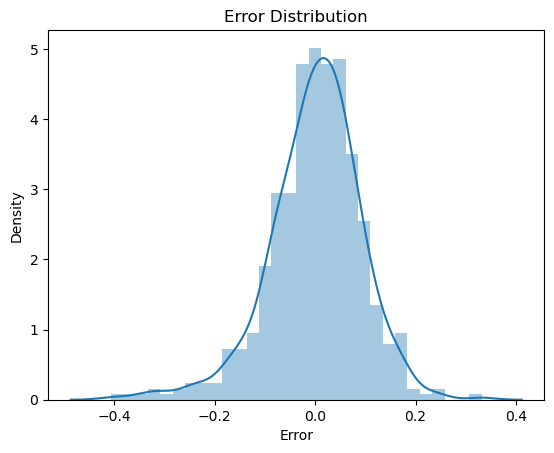

In [65]:
# Plotting Histogram to check for error distribution
sns.distplot((y_train - y_train_pred), bins = 30)
plt.title('Error Distribution')
plt.xlabel('Error')
plt.show()

In [66]:
# Since the distribution seems to be following a bell curve shape, we can move ahead and make the final prediction.

## Making Predictions using 18th Model.

In [67]:
# We are using Transform here instead of fit_transform because we want the same mean and Standard Deviation which was used to train the data above.
vars = ['temp','hum','windspeed','cnt']
bike_data_test[vars] = scaler.transform(bike_data_test[vars])

In [68]:
bike_data_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and y

In [69]:
y_test = bike_data_test.pop('cnt')
X_test = bike_data_test

In [70]:
# We will drop all the unnecessary columns as predicted in 18th Model
X_test_1 = X_test[X_train_rfe.columns]

In [71]:
# Adding constant to X_test_1
X_test_1 = sm.add_constant(X_test_1)

In [72]:
# Predicting values of y as per new X
y_test_pred = lr_7.predict(X_test_1)

## Model Evaluation

In [73]:
print('R Square on Final Train Model is - ',round(r2_score(y_train,y_train_pred),4))
print('R Square on Final Test Model is - ',round(r2_score(y_test,y_test_pred),4))

R Square on Final Train Model is -  0.8308
R Square on Final Test Model is -  0.7938


In [74]:
# Visualizing y_test and y_test_pred

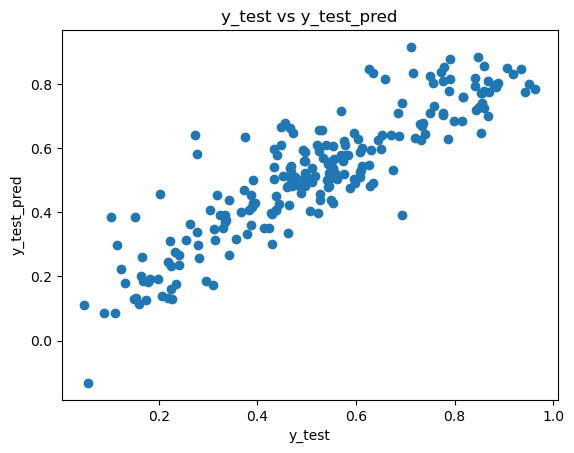

In [75]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

So, equation for Best Fitted line would be = 
cnt = 0.1264 + 0.2328 x yr - 0.0992 x holiday + 0.548 x temp - 0.1533 x windspeed + 0.0868 x Summer + 0.1306 x Winter + 0.1011 x September - 0.2838 x Light Snow - 0.797 x Mist

## Conclusion

As per the values obtained top three variables which hold the most weightage in determining the total count of bikes for rent prediction are
- Temp with weigtage of 0.548, which indicates with a unit increase in temp increases the bike rent numbers by 0.548 times
- Light Snow with weightage of -0.2838, which indicates with a unit increase in Light Snow weather decreases the bike rent numbers by 0.2838 times
- yr with weigtage of 0.2328, which indicates with a unit increase in yr increases the bike rent numbers by 0.2328 times